In [1]:
import numpy as np
from mlxtend.data import loadlocal_mnist
import matplotlib.pyplot as plt
from utils_MNIST import * 

In [2]:
# load MNIST train and test data 
X, Y = loadlocal_mnist(
        images_path='/Users/air/Documents/GitHub/random-features/train-images-idx3-ubyte', 
        labels_path='/Users/air/Documents/GitHub/random-features/train-labels-idx1-ubyte')

X2, Y2 = loadlocal_mnist(
        images_path='/Users/air/Documents/GitHub/random-features/t10k-images-idx3-ubyte', 
        labels_path='/Users/air/Documents/GitHub/random-features/t10k-labels-idx1-ubyte')

label1 = 7; label2 = 9; # choosing two classes for regression
X_trn, Y_trn, X_tst, Y_tst = make_two_classes(label1, label2, X, Y, X2, Y2)

In [3]:
# subsampling training and test datasets
np.random.seed(1)
N = 100; 
indx1 = np.random.permutation(X_trn.shape[0])[:N]
indx2 = np.random.permutation(X_tst.shape[0])[:N]
Xs_trn = X_trn[indx1][:]; Ys_trn = Y_trn[indx1][:];
Xs_tst = X_tst[indx2][:]; Ys_tst = Y_tst[indx2][:];

# Comparing Expected RF predictor with the Kernel predictor

In [4]:
Y_pred = KernelPredictor(Xs_trn, Ys_trn, Xs_tst)
np.linalg.norm(Y_pred - Ys_tst)**2 / Y_pred.size

0.9999999999999986

In [10]:
num_P = 8; 
P_list = 2**np.linspace(4,num_P,num_P)
aver_trn_list = np.zeros(num_P); aver_tst_list = np.zeros(num_P);
bias_list = np.zeros(num_P); var_list = np.zeros(num_P);

for i in range(num_P-4):
    P = int(P_list[i+4]);
    aver_trn, aver_tst, bias, var = expectedRFPredictor(Xs_trn, Xs_tst, Ys_trn, Ys_tst, P)
    aver_trn_list[i] = aver_trn; aver_tst_list[i] = aver_tst; 
    bias_list[i] = bias; var_list[i] = var; 
    print(P, aver_tst, bias, var)

/Users/air/Documents/GitHub/random-features/utils_MNIST.py:68: ComplexWarning: Casting complex values to real discards the imaginary part
  Y1_all[:,i] = Y1_pred; Y2_all[:,i] = Y2_pred;


78 926.4257367351405 4.32980287345689 469.99166495358963
115 2162.8298589562664 33.40168361143281 1910.5997298237219
172 454.60227891542934 29.990648783850833 403.1015743809667
256 232.5577489423858 30.66371429197599 192.69545618033476


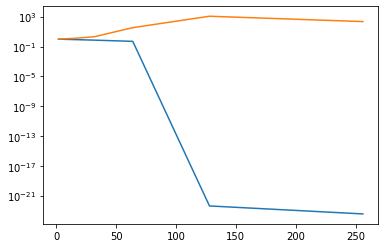

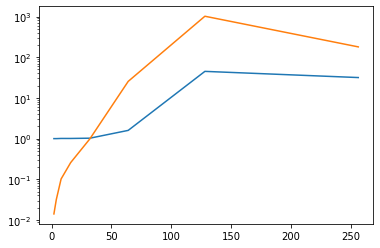

In [14]:
plt.plot(P_list, aver_trn_list)
plt.plot(P_list, aver_tst_list)
plt.yscale('log')
plt.show()
plt.plot(P_list, bias_list)
plt.plot(P_list, var_list)
plt.yscale('log')

In [15]:
aver_tst_list

array([1.01253215e+00, 1.03171550e+00, 1.11396436e+00, 1.27619679e+00,
       2.06598215e+00, 3.40545159e+01, 1.15006002e+03, 2.21181922e+02])

In [16]:
bias_list

array([ 0.99803281,  0.99847746,  1.00776565,  1.00730545,  1.02229172,
        1.59019116, 44.87526655, 31.62849619])